In [53]:
import matplotlib.pyplot as plt
import math
import tensorflow as tf
import tensorflow_datasets as tfds

In [54]:
# descargamos la libreria de tensorflow

datos, meta = tfds.load('mnist_corrupted', as_supervised=True, with_info=True)


In [55]:
#separamos los datos de prueba y de entrenamiento
d_train = datos['train']
d_test = datos['test']

In [56]:
#transformamos las imagenes a valores mas simples entre 0-1

numeros = meta.features['label'].names

def transformar(imagen, label):
  imagen = tf.cast(imagen, tf.float32)
  imagen = imagen / 255
  return imagen, label

d_train = d_train.map(transformar)
d_test = d_test.map(transformar)

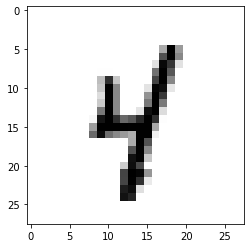

In [57]:
#imprimo una muestra de los datos de entrenamiento

for foto, label in d_train.take(1):
  break
muestra = foto.numpy().reshape((28,28))

plt.figure()
plt.imshow(muestra, cmap=plt.cm.binary)
plt.grid(False)
plt.show()

In [ ]:
# creamos el modelo


modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
#compilamos el modelo

modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

d_train = d_train.repeat().shuffle(60000).batch(32)
d_test = d_test.batch(32)

In [ ]:
#entrenamiento del modelo

epocas = math.ceil(60000/32)
training = modelo.fit(d_train, epochs=5, steps_per_epoch=epocas)



Epoch 1/5
1875/1875 [==============================] - 22s 9ms/step - loss: 0.2887 - accuracy: 0.9157
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1378 - accuracy: 0.9599
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0972 - accuracy: 0.9700
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0827 - accuracy: 0.9747
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0696 - accuracy: 0.9787




        GRAFICO DE PERDIDA EN EL ENTRENAMIENTO


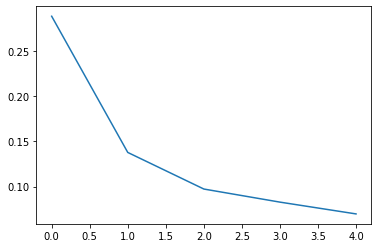

In [66]:
plt.plot(training.history['loss'])
print("\n\n        GRAFICO DE PERDIDA EN EL ENTRENAMIENTO")

In [ ]:
#desplegamos 25 imagenes con sus predicciones

import numpy as np

for img_samples, label_sample in d_test.take(1):
  img_samples = img_samples.numpy()
  label_sample = label_sample.numpy()
  predicciones = modelo.predict(img_samples)
  

  
def graficar(i, predicciones, etiquetas_reales, imagenes):
  predicciones, etiqueta_real, img = predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'green'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(meta.features['label'].names[etiqueta_prediccion],
                                100*np.max(predicciones),
                                meta.features['label'].names[etiqueta_real]),
                                color=color)
  
  
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1]) 
  etiqueta_prediccion = np.argmax(arr_predicciones)
  
  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')
  
filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar(i, predicciones, label_sample, img_samples)
  #plt.subplot(filas, 2*columnas, 2*i+2)
  #graficar_valor_arreglo(i, predicciones, label_sample)

In [ ]:
imagen = img_samples[9] 
imagen = np.array([imagen])
prediccion = modelo.predict(imagen)

print("Prediccion: " + meta.features['label'].names[np.argmax(prediccion[0])])

In [ ]:
for sample, etiqueta in d_test.take(1):
  sample = sample.numpy()
  etiqueta = etiqueta.numpy()
  pre = modelo.predict(sample)
  print("Prediccion: " + meta.features['label'].names[np.argmax(pre[0])])
  break

1/1 [==============================] - 0s 21ms/step
Prediccion: 2
